## Scrape the content

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
result=requests.get("https://transcripts.fandom.com/wiki/Avengers:_Infinity_War")

In [3]:
src=result.content
soup=BeautifulSoup(src,'lxml')

In [4]:
import pandas as pd

In [5]:
import re

In [6]:
import re
import pandas as pd
s = []
text = []
for link in soup.find_all('div'):
    if ("id","mw-content-text") in link.attrs.items():
        for l in link.find_all('p'):
            if l.find("b"):
                author = re.findall(r'(.*?):', l.text)
                text = re.sub(r'\[.*?\]',"",l.text)
                text = re.sub(r'.*?:',"", text)
                text = re.sub(r'\n','',text)
                try:
                    s.append((author[0],text))
                except:
                    pass

In [7]:
import numpy as np
pd.set_option('display.max_colwidth',-1)
r = np.random.randint(100)

#data=pd.DataFrame(s, columns = ['Title', 'Text'])[r:(r+10)]
data=pd.DataFrame(s, columns = ['Title', 'Text'])

In [8]:
data2=data.copy()

In [9]:
data2.head()

,Title,Text
0,Asgardian PA,"This is the Asgardian refugee vessel Statesman. We are under assault, I repeat, we are under assault - The engines are dead, life support failing. Requesting aid from any vessel within range. We are 22 jump points out of Asgard. Our crew is made up of Asgardian families, we have very few soldiers here. This is not a warcraft. I repeat, this is not a warcraft!"
1,Ebony Maw,"Hear me, and rejoice. You have had the privilege of being saved by the Great Titan.... You may think this is suffering... no. it is salvation. Universal scales tip toward balance because of your sacrifice. Smile... for even in death, you have become Children of Thanos."
2,Thanos,"I know what it's like to lose. To feel so desperately that you're right... yet to fail, nonetheless. It's frightening. Turns the legs to jelly. I ask you, to what end? Dread it. Run from it. Destiny arrives all the same. And now, it's here. Or should I say... I AM."
3,Thor,You talk too much.
4,Thanos,"The Tesseract, or your brother's head. I assume you have a preference."


## Using Spacy 

In [10]:
import spacy

In [11]:
nlp=spacy.load("en_core_web_md")

In [12]:
text=list(data2['Text'].str.lower())

In [13]:
text[:2]

[' this is the asgardian refugee vessel statesman. we are under assault, i repeat, we are under assault - the engines are dead, life support failing. requesting aid from any vessel within range. we are 22 jump points out of asgard.\xa0 our crew is made up of asgardian families, we have very few soldiers here. this is not a warcraft.\xa0i repeat, this is not a warcraft!',
 ' hear me, and rejoice. you have had the privilege of being saved by the great titan.... you may think this is suffering... no. it is salvation. universal scales tip\xa0toward balance because of your sacrifice. smile...  for even in death, you have become children of thanos.']

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

### Tokenize the Data

In [20]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [35]:
## Create our list of punctuation marks

In [24]:
punc=string.punctuation

In [25]:
punc=punc + '...' + '....'+''+'--'

In [26]:
## Create our list of stopwords

In [30]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [28]:
type(stop_words)

set

In [29]:
stop_words = stop_words.union(set(stop_new))

NameError: name 'stop_new' is not defined

In [41]:
## Load the English parser

In [21]:
parser=English()

In [21]:
text[1]

' hear me, and rejoice. you have had the privilege of being saved by the great titan.... you may think this is suffering... no. it is salvation. universal scales tip\xa0toward balance because of your sacrifice. smile...  for even in death, you have become children of thanos.'

In [45]:
## Creating our tokenizer function

In [22]:
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens=parser(sentence)
    
    ## Lemmatize
    mytokens=[word.lemma_.lower().strip() if word.lemma_!="-PRON-" else word.lower_ for word in mytokens]
    
    ## Remove stop words
    mytokens=[word for word in mytokens if word not in stop_words and word not in punc]
    
    ## return list of tokens
    return mytokens
    

In [23]:
text_copy=text.copy()

In [24]:
tokens=[]
for i in text:
    tokens.append(spacy_tokenizer(i))

In [25]:
tokens[:5]

[['asgardian',
  'refugee',
  'vessel',
  'statesman',
  'assault',
  'repeat',
  'assault',
  'engine',
  'dead',
  'life',
  'support',
  'fail',
  'request',
  'aid',
  'vessel',
  'range',
  '22',
  'jump',
  'point',
  'asgard',
  'crow',
  'asgardian',
  'family',
  'soldier',
  'warcraft',
  'repeat',
  'warcraft'],
 ['hear',
  'rejoice',
  'privilege',
  'save',
  'great',
  'titan',
  'think',
  'suffer',
  'salvation',
  'universal',
  'scale',
  'tip',
  'balance',
  'sacrifice',
  'smile',
  'death',
  'child',
  'thanos'],
 ['know',
  'like',
  'lose',
  'feel',
  'desperately',
  'right',
  'fail',
  'nonetheless',
  'frighten',
  'turn',
  'leg',
  'jelly',
  'ask',
  'end',
  'dread',
  'run',
  'destiny',
  'arrive'],
 ['talk'],
 ['tesseract', 'brother', 'head', 'assume', 'preference']]

In [26]:
len(tokens)

996

In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [29]:
from nltk.probability import FreqDist

In [30]:
tokens[:1]

[['asgardian',
  'refugee',
  'vessel',
  'statesman',
  'assault',
  'repeat',
  'assault',
  'engine',
  'dead',
  'life',
  'support',
  'fail',
  'request',
  'aid',
  'vessel',
  'range',
  '22',
  'jump',
  'point',
  'asgard',
  'crow',
  'asgardian',
  'family',
  'soldier',
  'warcraft',
  'repeat',
  'warcraft']]

In [31]:
flat_list = []
for sublist in tokens:
    for item in sublist:
        flat_list.append(item)

In [32]:
flat_list[:2]

['asgardian', 'refugee']

In [33]:
fdist = FreqDist(flat_list)

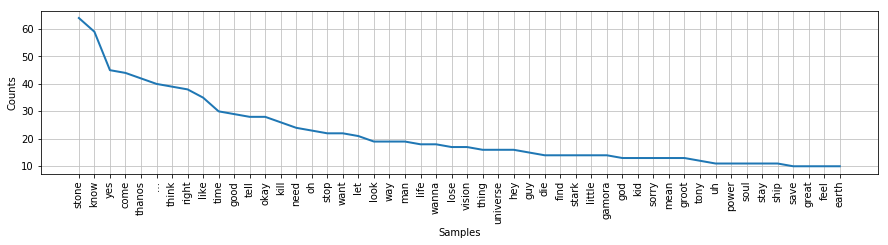

In [34]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,3
fdist.plot(50)
plt.show()

In [36]:
#stop_new=['stone','know','yes','come','...','think','right','time']

In [37]:
final_text=[]
for i in tokens:
    new=[]
    for j in i:
        new.append(j)
    final_text.append(' '.join(new))

In [38]:
final_text_ = []
for i in final_text:
    final_text_.append(re.sub('\d+',"", i))
final_text_.append(i)
final_text_

['asgardian refugee vessel statesman assault repeat assault engine dead life support fail request aid vessel range  jump point asgard crow asgardian family soldier warcraft repeat warcraft',
 'hear rejoice privilege save great titan think suffer salvation universal scale tip balance sacrifice smile death child thanos',
 'know like lose feel desperately right fail nonetheless frighten turn leg jelly ask end dread run destiny arrive',
 'talk',
 'tesseract brother head assume preference',
 'oh kill away',
 'right stop',
 'tesseract destroy asgard',
 'wrong brother',
 'assure brother sun shine',
 'optimism misplace asgardian',
 'good thing asgardian hulk',
 'let fun',
 'allfathers … let dark magic flow time',
 'mistake',
 'die',
 'shh',
 'humble personage … bow grandeur nay nobility wield infinity stone universe lie grasp',
 'stone earth find child bring titan',
 'father fail',
 'interject … earth want guide bite experience arena',
 'consider failure experience',
 'consider experience expe

## LSA

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, stop_words = 'english', max_features= 1000, smooth_idf=True)

In [230]:
X = vectorizer.fit_transform(final_text_)

In [231]:
X.shape

(997, 1000)

### Truncated_SVD

In [232]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
# Since we only have 170 features, take n_components = 100 (should be less than features)

svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100, random_state=123)

svd_model.fit(X)
svd_model.transform(X).shape
#svd_model.components_.shape

(997, 100)

In [233]:
# This are the weightages of individual terms in per topic / doc:
(svd_model.components_[0])

array([ 1.43289099e-17,  8.72239345e-04,  4.29891513e-03,  9.96334650e-04,
        7.11252068e-04,  2.56822239e-03,  8.24668010e-04,  3.03263160e-03,
        9.84108771e-03,  4.15881525e-04,  8.18286721e-03,  1.10584735e-03,
        2.50791222e-03,  1.26032628e-02,  1.44874083e-03,  2.47669328e-03,
        1.70585726e-03,  2.87952656e-04,  1.72662132e-04,  8.32797603e-22,
        8.07814180e-03, -6.45971851e-33,  8.17637160e-03,  1.82401658e-03,
        1.00912531e-02,  2.96465054e-03,  1.56815153e-02,  1.28815033e-05,
        5.83816949e-03,  9.96334650e-04,  1.18121472e-03,  1.18729690e-32,
        7.58648508e-04,  5.49878808e-03,  1.14544885e-02,  1.18121472e-03,
        4.85734848e-04,  8.91845693e-20,  8.27013327e-04,  1.25654487e-03,
        1.31076741e-02,  1.13482071e-02,  7.51365751e-04,  1.79450350e-03,
        1.34482998e-03,  6.51277752e-03,  5.95913991e-03,  2.46569112e-04,
        2.98736527e-02,  8.37867147e-04,  3.32029790e-03,  3.35253191e-03,
        2.75076122e-02,  

In [234]:
#The components of svd_model are our topics, and we can access them using svd_model.components_.
#Finally, let’s print a few most important words in each of the 21 topics and see how our model has done.

terms = vectorizer.get_feature_names()

for i, weight in enumerate(svd_model.components_):
    terms_weight = zip(terms, weight)
    #print(i)  i is the topic and svd_model has weight of each term in that topic
    #print(list(terms_comp))
    sorted_terms = sorted(terms_weight, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    y = []
    for t in sorted_terms:
        y.append(t[0])
    print(y)

Topic 0: 
['tell', 'thanos', 'okay', 'oh', 'kill', 'gamora', 'need']
Topic 1: 
['tell', 'die', 'ship', 'lie', 'groot', 'day', 'feel']
Topic 2: 
['okay', 'tell', 'thor', 'good', 'ready', 'like', 'hey']
Topic 3: 
['groot', 'let', 'speak', 'thing', 'quill', 'mean', 'dangerous']
Topic 4: 
['gamora', 'tell', 'okay', 'groot', 'daughter', 'thanos', 'mantis']
Topic 5: 
['gamora', 'let', 'good', 'like', 'thing', 'look', 'guy']
Topic 6: 
['oh', 'god', 'gamora', 'like', 'tony', 'look', 'stay']
Topic 7: 
['let', 'oh', 'thing', 'god', 'kill', 'close', 'long']
Topic 8: 
['stop', 'like', 'hey', 'look', 'need', 'mean', 'vision']
Topic 9: 
['hey', 'stop', 'vision', 'good', 'stark', 'tony', 'word']
Topic 10: 
['vision', 'word', 'leave', 'guy', 'maybe', 'thing', 'somebody']
Topic 11: 
['die', 'kill', 'want', 'wanna', 'kid', 'lose', 'place']
Topic 12: 
['want', 'kill', 'thing', 'wrong', 'lose', 'sorry', 'kid']
Topic 13: 
['stop', 'die', 'need', 'thing', 'oh', 'life', 'soul']
Topic 14: 
['want', 'kid', 'wa

## LDA Model for Topic Modelling

### CountVectorizer

In [235]:
from sklearn.feature_extraction.text import CountVectorizer

In [236]:
final_text[:2]

['asgardian refugee vessel statesman assault repeat assault engine dead life support fail request aid vessel range 22 jump point asgard crow asgardian family soldier warcraft repeat warcraft',
 'hear rejoice privilege save great titan suffer salvation universal scale tip balance sacrifice smile death child thanos']

In [240]:
vectorizer = CountVectorizer()
X_lda = vectorizer.fit_transform(final_text_)

In [241]:
X_lda.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [242]:
vectorizer.get_feature_names()

['aaaahhhhh',
 'ability',
 'aboard',
 'absolutely',
 'accomplish',
 'accord',
 'acorn',
 'act',
 'actually',
 'add',
 'admit',
 'adult',
 'advantage',
 'ago',
 'ah',
 'ahead',
 'ahhhhh',
 'aid',
 'air',
 'alert',
 'alien',
 'alike',
 'alive',
 'allfathers',
 'allow',
 'almighty',
 'alright',
 'alternate',
 'angel',
 'anger',
 'angry',
 'anguish',
 'animal',
 'annoy',
 'ant',
 'anxious',
 'anybody',
 'anymore',
 'apropos',
 'arena',
 'arm',
 'army',
 'arrest',
 'arrive',
 'art',
 'asgard',
 'asgardian',
 'ash',
 'ask',
 'aspect',
 'ass',
 'assault',
 'asshole',
 'assortment',
 'assume',
 'assure',
 'at',
 'atmosphere',
 'attach',
 'attachment',
 'attack',
 'attempt',
 'attitude',
 'autopilot',
 'avenger',
 'aw',
 'awaken',
 'away',
 'awesome',
 'awkward',
 'ax',
 'axis',
 'baby',
 'backpack',
 'backup',
 'bacon',
 'bad',
 'baku',
 'balance',
 'balloon',
 'band',
 'bang',
 'banish',
 'banner',
 'barely',
 'barrier',
 'bastard',
 'bathroom',
 'beam',
 'bear',
 'beard',
 'beat',
 'beatles'

In [243]:
data_lda=pd.DataFrame(X_lda.toarray(),columns=vectorizer.get_feature_names())

In [244]:
data_lda.head()

,aaaahhhhh,ability,aboard,absolutely,accomplish,accord,acorn,act,actually,add,...,wow,wrong,xandar,yank,yawn,year,yep,york,zarg,zehobereians
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
from gensim import matutils,models
import scipy.sparse

In [249]:
# One of the required inputs is a term-document matrix
tdm = data_lda.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,987,988,989,990,991,992,993,994,995,996
aaaahhhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accomplish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [251]:
sparse_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [252]:
corpus

In [253]:
# Gensim also requires dictionary of the all terms and 
#their respective location in the term-document matrix


cv = vectorizer
id2word = dict((v, k) for k, v in cv.vocabulary_.items()) ## we want location:term dictionary

In [254]:
id2word

{46: 'asgardian',
 833: 'refugee',
 1102: 'vessel',
 974: 'statesman',
 51: 'assault',
 842: 'repeat',
 323: 'engine',
 248: 'dead',
 587: 'life',
 1004: 'support',
 351: 'fail',
 844: 'request',
 17: 'aid',
 822: 'range',
 556: 'jump',
 778: 'point',
 45: 'asgard',
 232: 'crow',
 356: 'family',
 945: 'soldier',
 1117: 'warcraft',
 471: 'hear',
 836: 'rejoice',
 801: 'privilege',
 890: 'save',
 439: 'great',
 1044: 'titan',
 997: 'suffer',
 884: 'salvation',
 1094: 'universal',
 891: 'scale',
 1042: 'tip',
 78: 'balance',
 878: 'sacrifice',
 941: 'smile',
 250: 'death',
 169: 'child',
 1031: 'thanos',
 589: 'like',
 599: 'lose',
 366: 'feel',
 265: 'desperately',
 700: 'nonetheless',
 408: 'frighten',
 1079: 'turn',
 582: 'leg',
 544: 'jelly',
 48: 'ask',
 318: 'end',
 295: 'dread',
 874: 'run',
 266: 'destiny',
 43: 'arrive',
 1018: 'talk',
 1028: 'tesseract',
 131: 'brother',
 470: 'head',
 54: 'assume',
 795: 'preference',
 712: 'oh',
 561: 'kill',
 67: 'away',
 984: 'stop',
 267: '

In [255]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - 
#the number of topics and the number of passes

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, 
                      passes=10)
lda.print_topics()

[(0,
  '0.014*"okay" + 0.012*"good" + 0.010*"need" + 0.010*"tell" + 0.009*"man" + 0.008*"vision" + 0.007*"oh" + 0.007*"want" + 0.007*"god" + 0.006*"universe"'),
 (1,
  '0.019*"thanos" + 0.013*"like" + 0.010*"stop" + 0.010*"let" + 0.009*"wanna" + 0.008*"kill" + 0.008*"lose" + 0.008*"hey" + 0.007*"way" + 0.007*"look"')]

In [256]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.016*"stop" + 0.014*"want" + 0.013*"man" + 0.012*"vision" + 0.011*"hey" + 0.010*"die" + 0.010*"thing" + 0.009*"need" + 0.008*"let" + 0.008*"god"'),
 (1,
  '0.021*"tell" + 0.018*"good" + 0.009*"groot" + 0.009*"stay" + 0.008*"guy" + 0.008*"save" + 0.007*"alright" + 0.007*"space" + 0.007*"drax" + 0.006*"find"'),
 (2,
  '0.025*"thanos" + 0.017*"like" + 0.017*"okay" + 0.013*"way" + 0.011*"oh" + 0.010*"kill" + 0.010*"look" + 0.010*"wanna" + 0.008*"uh" + 0.007*"mean"')]

## Analysis of Verbs, Nouns and Adjectives

In [14]:
text[:2]

[' this is the asgardian refugee vessel statesman. we are under assault, i repeat, we are under assault - the engines are dead, life support failing. requesting aid from any vessel within range. we are 22 jump points out of asgard.\xa0 our crew is made up of asgardian families, we have very few soldiers here. this is not a warcraft.\xa0i repeat, this is not a warcraft!',
 ' hear me, and rejoice. you have had the privilege of being saved by the great titan.... you may think this is suffering... no. it is salvation. universal scales tip\xa0toward balance because of your sacrifice. smile...  for even in death, you have become children of thanos.']

### Get the verb Count:

In [58]:
for i in text:
    doc1=nlp(i)
    for i in doc1:
        #print(i.pos_)
        if i.is_stop:
            continue
        if i.pos_ == 'VERB':
            if i.lemma_ in pos_count:
                pos_count[i.lemma_] += 1
            else:
                pos_count[i.lemma_] = 1    

In [59]:
print("top 10 VERBs {}".format(sorted(pos_count.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 VERBs [('know', 59), ('go', 50), ('come', 44), ('get', 41), ('think', 39), ('tell', 27), ('kill', 26), ('need', 24), ('want', 22), ('stop', 21)]


In [68]:
pos_count_verb={}
pos_count_verb=sorted(pos_count.items(), key=lambda kv: kv[1], reverse=True)[:10]

In [79]:
def Convert(tup, di): 
    di=dict(tup)
    return di 

In [80]:
dictionary={}
pos_count_verb=Convert(pos_count_verb, dictionary)

In [81]:
pos_count_verb

{'know': 59,
 'go': 50,
 'come': 44,
 'get': 41,
 'think': 39,
 'tell': 27,
 'kill': 26,
 'need': 24,
 'want': 22,
 'stop': 21}

In [62]:
### Distribution of Verbs:

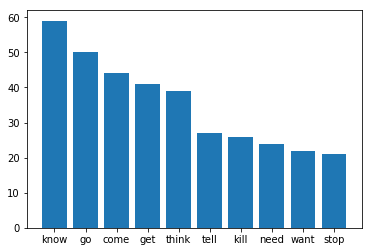

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(pos_count_verb)), list(pos_count_verb.values()), align='center')
plt.xticks(range(len(pos_count_verb)), list(pos_count_verb.keys()))
plt.show()

### Get the Adverbs:

In [93]:
adverb_count={}

In [95]:

for i in text:
    doc1=nlp(i)
    for i in doc1:
        #print(i.pos_)
        if i.is_stop:
            continue
        if i.pos_ == 'ADV':
                try:
                    if i.lemma_ in adverb_count:
                        adverb_count[i.lemma_] += 1
                    else:
                        adverb_count[i.lemma_] = 1 
                except:
                    print(i.lemma_)

In [96]:
print("top 10 ADVERBs {}".format(sorted(adverb_count.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 ADVERBs [('right', 17), ('maybe', 9), ('exactly', 8), ('better', 7), ('long', 6), ('seriously', 6), ('away', 4), ('ago', 4), ('home', 4), ('…', 4)]


In [97]:
adverb_count_new={}
adverb_count_new=sorted(adverb_count.items(), key=lambda kv: kv[1], reverse=True)[:10]
def Convert(tup, di): 
    di=dict(tup)
    return di 

In [98]:
dictionary={}
adverb_count=Convert(adverb_count_new, dictionary)

In [99]:
adverb_count

{'right': 17,
 'maybe': 9,
 'exactly': 8,
 'better': 7,
 'long': 6,
 'seriously': 6,
 'away': 4,
 'ago': 4,
 'home': 4,
 '…': 4}

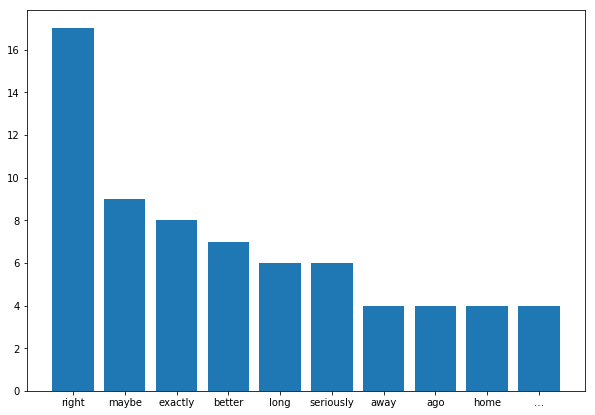

In [104]:
plt.figure(figsize=(10,7))
plt.bar(range(len(adverb_count)), list(adverb_count.values()), align='center')
plt.xticks(range(len(adverb_count)), list(adverb_count.keys()))
plt.show()

### Get the Nouns

In [105]:
noun_count={}

In [106]:

for i in text:
    doc1=nlp(i)
    for i in doc1:
        #print(i.pos_)
        if i.is_stop:
            continue
        if i.pos_ == 'NOUN':
                try:
                    if i.lemma_ in noun_count:
                        noun_count[i.lemma_] += 1
                    else:
                        noun_count[i.lemma_] = 1 
                except:
                    print(i.lemma_)

In [107]:
print("top 10 Nouns {}".format(sorted(noun_count.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Nouns [('stone', 64), ('thanos', 39), ('time', 30), ('life', 22), ('way', 18), ('vision', 17), ('man', 17), ('thing', 16), ('universe', 16), ('guy', 15)]


In [108]:
noun_count_new={}
noun_count_new=sorted(noun_count.items(), key=lambda kv: kv[1], reverse=True)[:10]
def Convert(tup, di): 
    di=dict(tup)
    return di 

In [109]:
dictionary={}
noun_count=Convert(noun_count_new, dictionary)

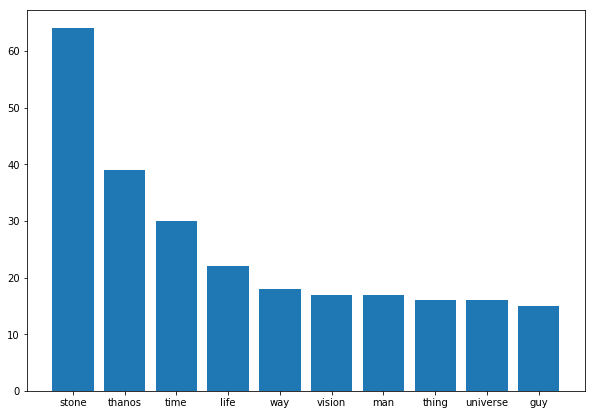

In [110]:
plt.figure(figsize=(10,7))
plt.bar(range(len(noun_count)), list(noun_count.values()), align='center')
plt.xticks(range(len(noun_count)), list(noun_count.keys()))
plt.show()

### Get the Adjectives

In [111]:
adjective_count={}

In [112]:

for i in text:
    doc1=nlp(i)
    for i in doc1:
        #print(i.pos_)
        if i.is_stop:
            continue
        if i.pos_ == 'ADJ':
                try:
                    if i.lemma_ in adjective_count:
                        adjective_count[i.lemma_] += 1
                    else:
                        adjective_count[i.lemma_] = 1 
                except:
                    print(i.lemma_)

In [115]:
print("top 10 Adjectives {}".format(sorted(adjective_count.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Adjectives [('good', 19), ('right', 15), ('sorry', 13), ('stark', 13), ('little', 11), ('great', 10), ('sure', 9), ('big', 8), ('dead', 7), ('new', 7)]


In [116]:
adjective_count_new={}
adjective_count_new=sorted(adjective_count.items(), key=lambda kv: kv[1], reverse=True)[:10]
def Convert(tup, di): 
    di=dict(tup)
    return di 

In [117]:
dictionary={}
adjective_count=Convert(adjective_count_new, dictionary)

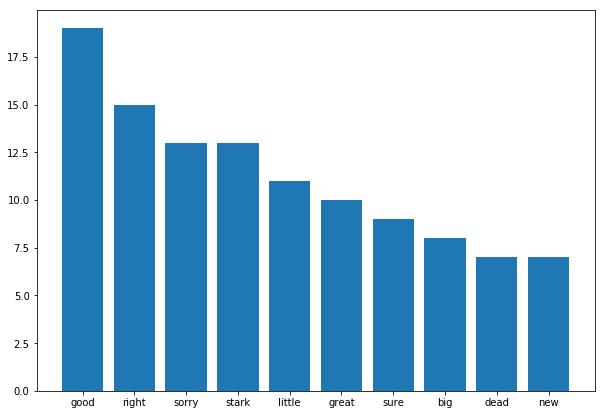

In [118]:
plt.figure(figsize=(10,7))
plt.bar(range(len(adjective_count)), list(adjective_count.values()), align='center')
plt.xticks(range(len(adjective_count)), list(adjective_count.keys()))
plt.show()

## Entity wise Verbs, Nouns

### Top 30 Entities

In [146]:
entities = {}
for i in text:
    doc1=nlp(i)
# named entities
    for ent in doc1.ents:
        #if(ent.label_ =='PERSON'):
    # Print the entity text and its label
        if ent.text in entities:
            entities[ent.text] += 1
        else:
            entities[ent.text] = 1
        
print("top entities {}".format(sorted(entities.items(),
      key=lambda kv: kv[1], reverse=True)[:50]))

top entities [('Thanos', 35), ('Groot', 12), ('Gamora', 12), ('Stark', 11), ('half', 10), ('Earth', 9), ('one', 7), ('Tony', 7), ('Thor', 7), ('Quill', 7), ('six', 6), ('Cap', 6), ('Asgard', 5), ('Titan', 5), ('the Time Stone', 5), ('the Soul Stone', 5), ('Wanda', 5), ('One', 5), ('MAYEFA YA HU', 5), ('Asgardian', 4), ('two', 4), ('New York', 4), ('Knowhere', 4), ('Wakanda', 4), ('Stone', 3), ('first', 3), ('Universe', 3), ('Nivadellir', 3), ('Peter', 3), ('Vormir', 3), ('Sam', 3), ('Loki', 2), ('Vision', 2), ('Steve Rogers', 2), ('Doc', 2), ('today', 2), ('four', 2), ('Avengers', 2), ('Nidavellir', 2), ('second', 2), ('Mantis', 2), ('Accords', 2), ('Bruce', 2), ('Scott', 2), ('Kingsguard', 2), ('the Border Tribe', 2), ('Nebula', 2), ('Contraxia', 2), ('Lord', 2), ('Footloose', 2)]


In [156]:
entities_new={}
entities_new=sorted(entities.items(), key=lambda kv: kv[1], reverse=True)[:30]
def Convert(tup, di): 
    di=dict(tup)
    return di 

In [157]:
dictionary={}
entities=Convert(entities_new, dictionary)

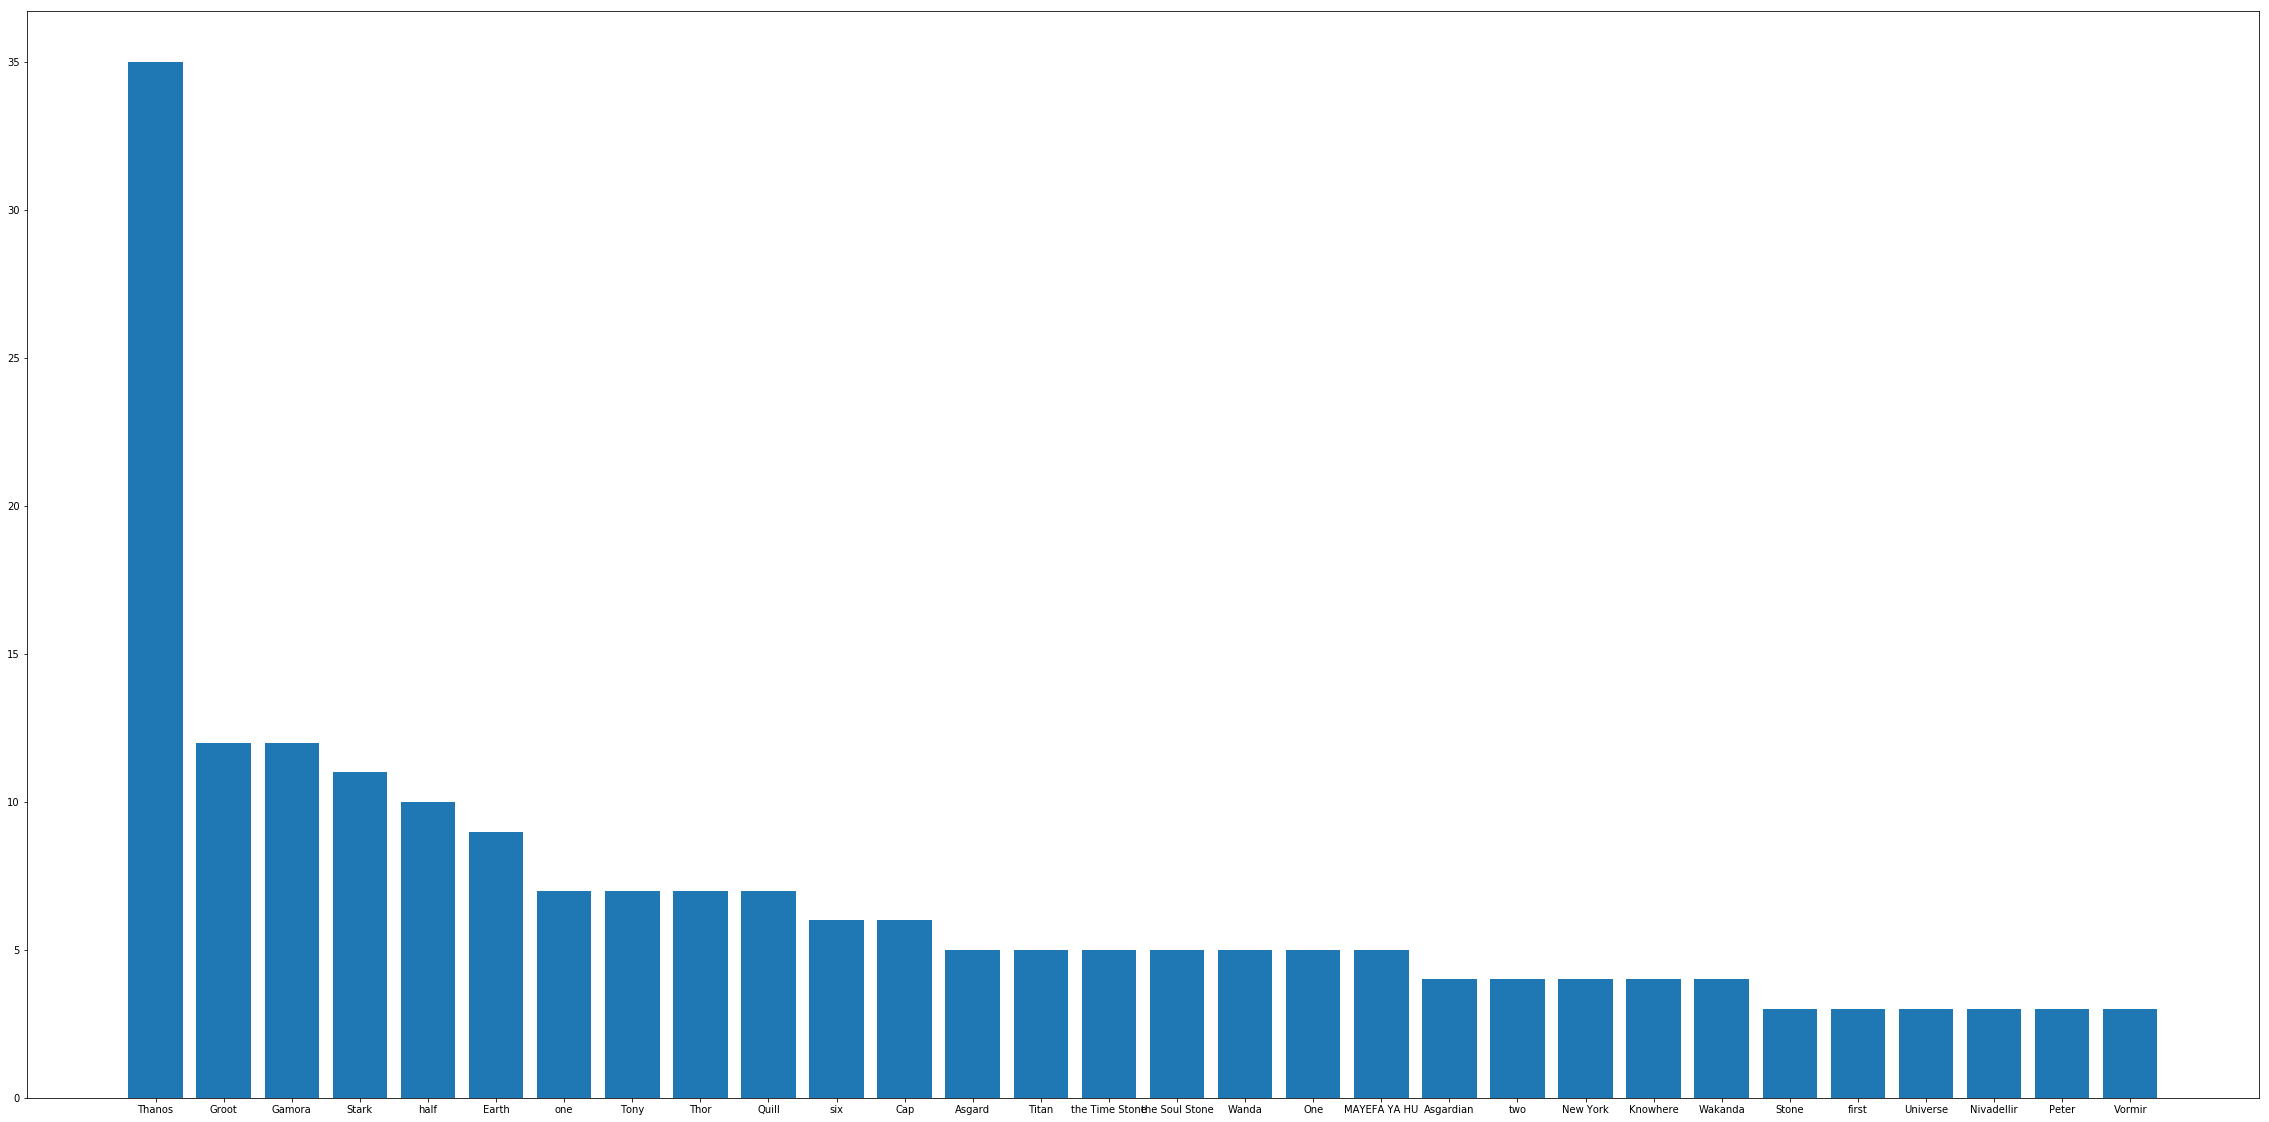

In [160]:
plt.figure(figsize=(40,20))
plt.bar(range(len(entities)), list(entities.values()), align='center')
plt.xticks(range(len(entities)), list(entities.keys()))
plt.show()

### Entity wise Verb

#### Verbs by Thanos

In [161]:
thanos_verb={}
for i in text:
    doc1=nlp(i)
    for ent in doc1.ents:
        if(ent.text=='Thanos'):
            for i in doc1:
                #print(i.pos_)
                if i.is_stop:
                    continue
                if i.pos_ == 'VERB':
                    if i.lemma_ in thanos_verb:
                        thanos_verb[i.lemma_] += 1
                    else:
                        thanos_verb[i.lemma_] = 1    

In [165]:
print("top 10 Verbs {}".format(sorted(thanos_verb.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Verbs [('know', 8), ('kill', 7), ('go', 6), ('get', 5), ('stop', 4), ('come', 3), ('need', 3), ('talk', 2), ('steal', 2), ('see', 2)]


#### Nouns by Thanos

In [163]:
thanos_noun={}
for i in text:
    doc1=nlp(i)
    for ent in doc1.ents:
        if(ent.text=='Thanos'):
            for i in doc1:
                #print(i.pos_)
                if i.is_stop:
                    continue
                if i.pos_ == 'NOUN':
                    if i.lemma_ in thanos_noun:
                        thanos_noun[i.lemma_] += 1
                    else:
                        thanos_noun[i.lemma_] = 1    

In [164]:
print("top 10 Nouns {}".format(sorted(thanos_noun.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Adjectives [('stone', 5), ('daughter', 3), ('way', 3), ('experience', 2), ('ship', 2), ('moron', 2), ('army', 2), ('life', 2), ('head', 2), ('year', 2)]


### Tony Stark Verbs

In [166]:
Stark_verb={}
for i in text:
    doc1=nlp(i)
    for ent in doc1.ents:
        if(ent.text=='Stark'):
            for i in doc1:
                #print(i.pos_)
                if i.is_stop:
                    continue
                if i.pos_ == 'VERB':
                    if i.lemma_ in Stark_verb:
                        Stark_verb[i.lemma_] += 1
                    else:
                        Stark_verb[i.lemma_] = 1    

In [167]:
print("top 10 Verbs {}".format(sorted(Stark_verb.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Verbs [('wanna', 4), ('know', 2), ('beam', 1), ('smell', 1), ('give', 1), ('understand', 1), ('come', 1), ('save', 1), ('hesitate', 1), ('let', 1)]


In [170]:
Stark_noun={}
for i in text:
    doc1=nlp(i)
    for ent in doc1.ents:
        if(ent.text=='Tony'):
            for i in doc1:
                #print(i.pos_)
                if i.is_stop:
                    continue
                if i.pos_ == 'NOUN':
                    if i.lemma_ in Stark_noun:
                        Stark_noun[i.lemma_] += 1
                    else:
                        Stark_noun[i.lemma_] = 1    

In [171]:
print("top 10 Verbs {}".format(sorted(Stark_noun.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Verbs [('plague', 1), ('planet', 1), ('population', 1), ('attack', 1), ('telling', 1), ('creature', 1), ('universe', 1), ('hand', 1), ('bot', 1), ('choice', 1)]


In [172]:
Groot_noun={}
for i in text:
    doc1=nlp(i)
    for ent in doc1.ents:
        if(ent.text=='Groot'):
            for i in doc1:
                #print(i.pos_)
                if i.is_stop:
                    continue
                if i.pos_ == 'NOUN':
                    if i.lemma_ in Groot_noun:
                        Groot_noun[i.lemma_] += 1
                    else:
                        Groot_noun[i.lemma_] = 1    

In [173]:
print("top 10 Nouns {}".format(sorted(Groot_noun.items(), key=lambda kv: kv[1], reverse=True)[:10]))    

top 10 Nouns [('face', 2), ('thing', 2), ('moron', 2), ('ship', 1), ('assortment', 1), ('pirate', 1), ('angel', 1), ('way', 1), ('captain', 1), ('game', 1)]
